# Entering the US Fast Food market project

## Background

2019 Our work as an analysts for a large Russian fast food restaurant chain that specializes in pancakes. The company plans to enter the US market. Our colleagues have prepared a list of cities that are prioritized in terms of market validation: Columbus, Ohio; Cincinnati, Ohio; Cleveland, Ohio; Las Vegas, Nevada; Miami, Florida; Birmingham, Alabama; Indianapolis,Indiana; Portland,Oregon. We need to analyse the dataset to make recommendations on the restaurants opening in the target cities.

## Objectives and steps of the analysis.

### 1. Analyze Fast Food market in the US

Import necessary dataset, modules and libraries

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("Restaurants.csv")


FileNotFoundError: [Errno 2] No such file or directory: 'Restaurants.csv'

In [4]:
import re

In [5]:
!pip install plotly

In [6]:
import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

We'll use Folium module for processing geospatial data

In [7]:
!pip install folium


In [8]:
import folium
from folium.plugins import FastMarkerCluster

Dataset Overview

In [9]:
df.head()

address                    city country  \
0            324 Main St                 Massena      US   
1        530 Clinton Ave  Washington Court House      US   
2   408 Market Square Dr               Maysville      US   
3  6098 State Highway 37                 Massena      US   
4        139 Columbus Rd                  Athens      US   

                                                keys  latitude  longitude  \
0                us/ny/massena/324mainst/-1161002137  44.92130  -74.89021   
1  us/oh/washingtoncourthouse/530clintonave/-7914...  39.53255  -83.44526   
2       us/ky/maysville/408marketsquaredr/1051460804  38.62736  -83.79141   
3       us/ny/massena/6098statehighway37/-1161002137  44.95008  -74.84553   
4               us/oh/athens/139columbusrd/990890980  39.35155  -82.09728   

               name postalCode province  \
0        McDonald's      13662       NY   
1           Wendy's      43160       OH   
2  Frisch's Big Boy      41056       KY   
3        McDonald's      13662       NY   
4   OMG! Rotisserie      45701       OH   

                                            websites  
0  http://mcdonalds.com,http://www.mcdonalds.com/...  
1                              http://www.wendys.com  
2  http://www.frischs.com,https://www.frischs.com...  
3  http://mcdonalds.com,http://www.mcdonalds.com/...  
4  http://www.omgrotisserie.com,http://omgrotisse...

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   address     10000 non-null  object 
 1   city        10000 non-null  object 
 2   country     10000 non-null  object 
 3   keys        10000 non-null  object 
 4   latitude    10000 non-null  float64
 5   longitude   10000 non-null  float64
 6   name        10000 non-null  object 
 7   postalCode  10000 non-null  object 
 8   province    10000 non-null  object 
 9   websites    9535 non-null   object 
dtypes: float64(2), object(8)
memory usage: 781.4+ KB


In [11]:
df.isnull().sum() #check for null values

address         0
city            0
country         0
keys            0
latitude        0
longitude       0
name            0
postalCode      0
province        0
websites      465
dtype: int64

The data have no null values (in the relevant columns), so need no data cleaning.

Delete irrelevant columns

In [12]:
df.drop(columns=['id','dateAdded','dateUpdated','country','keys','sourceURLs','websites'],inplace=True)

KeyError: "['id' 'dateAdded' 'dateUpdated' 'sourceURLs'] not found in axis"

In [ ]:
df.head()

Visualize Fast Food Restaurants on the US map

In [ ]:
lats = df['latitude'].tolist()
lons = df['longitude'].tolist()
locations = list(zip(lats, lons))

state_map = folium.Map(location=[40.0000, -90.0000], zoom_start=5)
FastMarkerCluster(data=locations).add_to(state_map)
state_map

Conduct exploratory analysis of the dataset.
Visualize Restaurants distribution among the states.

In [ ]:
state=df.groupby(['province']).agg({'name':'count'})
state.columns=['Count of restaurants']
state.sort_values('Count of restaurants',ascending=False,inplace=True)
state.reset_index(inplace=True)

state['Percentage']=100*state['Count of restaurants']/state['Count of restaurants'].sum()

fig=px.bar(state,x="province",y="Percentage")
fig.update_traces(marker_color='Green')
fig.update_layout(xaxis_title="State",yaxis_title="Percentage",title="Fast Food Restaurant Presence in the US(%)")
fig.show()

On the graph above we can learn market share for our target states. 
We see that Ohio and Florida are top 2, Alabama is forth in the rating, followed buy Indiana. Oregon holds tenth place, while Nevada is far away in this rating.

### 2. Have a closer look on our target cities. Leave only target cities in dataset.

In [ ]:
df = df[((df['city']=='Columbus')&( df['province']=='OH'))|
        ((df['city']=='Cincinnati')&( df['province']=='OH'))|
        ((df['city']=='Cleveland')&( df['province']=='OH'))|
        ((df['city']=='Las Vegas')&( df['province']=='NV'))|
        ((df['city']=='Miami')&( df['province']=='FL'))|
        ((df['city']=='Portland')&( df['province']=='OR'))|
        ((df['city']=='Indianapolis')&( df['province']=='IN'))|
        ((df['city']=='Birmingham')&( df['province']=='AL'))]

In [ ]:
df

In [ ]:
df.info() 

Visualize number of Restaurants in the rarget cities.

In [ ]:
city = df.groupby(['city']).agg({'name':'count'})
city.columns=['Count of Restaurants']
city.sort_values('Count of Restaurants',ascending=False,inplace=True)
city.reset_index(inplace=True)


fig=px.bar(city,x="city",y="Count of Restaurants")
fig.update_traces(marker_color='Orange')
fig.update_layout(xaxis_title="City",yaxis_title="Number of restaurants",title="Number of Fast Food Restaurants in target cities")
fig.show()

We'll leave a dataframe with the target cities and count of restaurants for the further purposes.

In [ ]:
city

In [ ]:
city_counts=df.groupby(['city']).agg({'name':'count'})
city_counts.columns=['Count of restaurants']

city_counts.sort_values('Count of restaurants', ascending=False,inplace=True)
city_counts['percentage']=100*city_counts['Count of restaurants']/city_counts['Count of restaurants'].sum()
city_counts.reset_index(inplace=True)
# print(region_counts)

fig=px.pie(city_counts,values='percentage',names='city',title='Restaurants share by city',width=600,height=500,
           color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

We'll add a map visualisation for the target cities:

In [ ]:
lats = df['latitude'].tolist()
lons = df['longitude'].tolist()
locations = list(zip(lats, lons))

state_map = folium.Map(location=[40.0000, -90.0000], zoom_start=5)
FastMarkerCluster(data=locations).add_to(state_map)
state_map

### 3. Let's add macroeconomical data to conduct further analysis of the US market (in target cities).

We'll use the US census data for 2018.

In [ ]:
census = pd.read_csv("census_county.csv")

In [ ]:
census

Data cleaning (dropping unnecessary for our analyses columns)

In [ ]:
census.drop(columns=['CountyId','Men','Women','MeanCommute', 'Drive','Walk','Carpool','VotingAgeCitizen','Professional','Service','Office','Construction','Production','Transit','OtherTransp','WorkAtHome','Employed','PrivateWork','PublicWork','SelfEmployed','FamilyWork'],inplace=True)

To have a closer look on our target cities we'll leave relevant to our cities counties in the dataset

Ohio_county = Franklin County, Hamilton County, Cuyahoga County Alabama_county = Jefferson County Oregon_county = Multnomah County Indiana_county = Marion County Florida_county = Miami-Dade County Nevada_county = Clark County

In [ ]:
census = census[(census['State']=='Ohio')&(census['County']=='Franklin County')|
                (census['State']=='Ohio')&(census['County']=='Hamilton County')|
                (census['State']=='Ohio')&(census['County']=='Cuyahoga County')|
                (census['State']=='Alabama')&(census['County']=='Jefferson County')|
                (census['State']=='Oregon')&(census['County']=='Multnomah County')|
                (census['State']=='Indiana')&(census['County']=='Marion County')|
               (census['State']=='Florida')&(census['County']=='Miami-Dade County')|
                (census['State']=='Nevada')&(census['County']=='Clark County')]

Add a 'City' column to the census dataset.

In [ ]:
census['City'] = ['Birmingham', 'Miami', 'Indianapolis', 'Nevada', 'Cleveland', 'Columbus', 'Cincinnati', 'Portland']

In [ ]:
census

### 4. Join number of restaurants information with census data to draw further conclusions. 

In [ ]:
result = city.set_index('city').join(census.set_index('City'))

In [ ]:
result.reset_index()

## Conclusions

### 1. Now we can make an assumption that number of restaurants is dependent on the income of the target city population. 
We'll examine wether we can see this relationship with help of scatter plot and linear regression line. 

In [ ]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

ax = result.plot.scatter(x='Count of Restaurants', y='Income', alpha=0.5)

plt.show()

Although we can draw some conclusions already, due to lack of data we gonna make an additional assumption that there is a positive linear relationship between number of restaurants and population income. We add a zero row as a beginning of coordinates to see clearer results. 

In [ ]:
result.loc[len(result)] = 0

In [ ]:
sns.pairplot(result, x_vars = "Count of Restaurants", y_vars = "Income", height = 5, aspect = 0.7, kind = 'reg')

### 2. Based on the obtained results we can conclude that number of restaurants positively connected with the population income. For our purposes we are particularly interested in the cities with higher income and lower number of restaurants in order to open new restaurants there. Such cities are located higher of the regression line on the graph.

## Limitations of the study

### 1. Our regression model is based on limited data and assumptions. In order to confirm or to reject our conclusions about relationship between population Income and Number of Restaurants we need more data. 

### 2. Higher population income does not mean higher population or population density. Therefore we cannot say for sure that more rich cities have the capacity for more restaurants. Therefore further multifactorial analyses is needed. Nevertheless we can say that amount of money in the area is an important factor for business opening.

### 3. Relationship between income and number of restaurants cannot be purely linear due to the limited capability of fast food consumption (a person would rather improve food quality with the rise of income, than amount of food consumed). The relationship is probably closer to logarithmic one.

# Additional data for city locations recommendations 

In [13]:
cityboxes = {'Columbus':(-83.1511,-82.8273,39.8618,40.1230),'Cincinnati':(-84.6380, -84.2878, 39.0387, 39.2461),'Cleveland':(-81.9292,-81.5158,41.3959,41.5933),'Las-Vegas':(-115.3344,-115.0468,36.1107,36.2858),'Miami':(-80.3142,-80.0711,25.6762,25.9136),'Indianapolis':(-86.2891, -86.0226, 39.6863, 39.9357),'Birmingham':(-86.9314, -86.6646, 33.4337, 33.6156),'Portland':(-122.8034, -122.5305, 45.4038, 45.6193)}
Cincinnati_map = plt.imread('Cincinnati -84.6380,-84.2878,39.0387,39.2461.png')
Cleveland_map = plt.imread('Cleveland -81.9292,-81.5158,41.3959,41.5933.png')
LasVegas_map = plt.imread('Las-Vegas -115.3344,-115.0468,36.1107,36.2858.png')
Portland_map=plt.imread('Portland -122.8034, -122.5305, 45.4038, 45.6193.png')

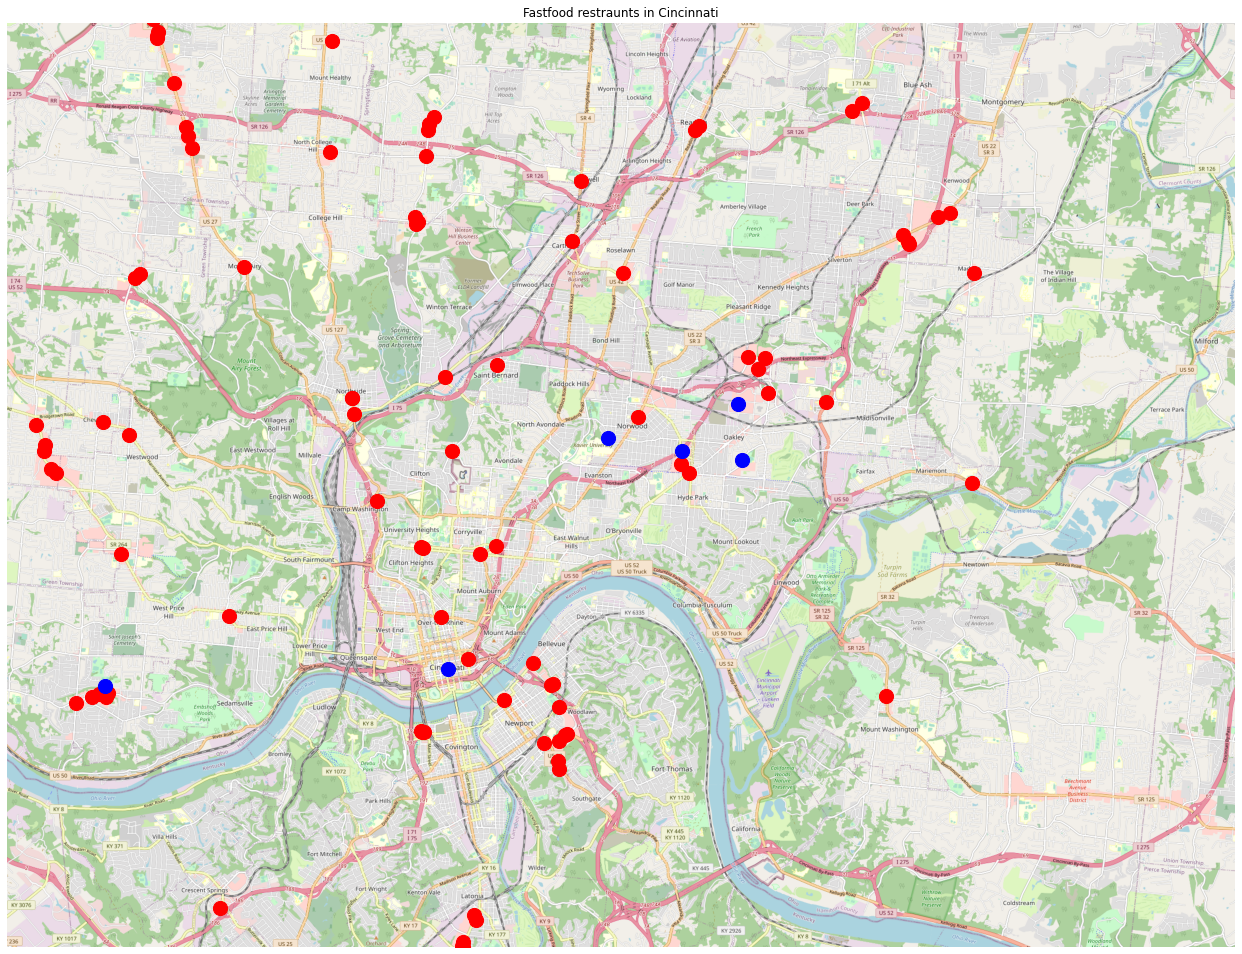

In [14]:
BBox = cityboxes['Cincinnati']

fig, ax = plt.subplots()

fig.set_figwidth(22) 
fig.set_figheight(17) 


ax.scatter(df.longitude, df.latitude, zorder=1, alpha= 1, c='r', s=200)
ax.scatter([-84.512370,-84.610150,-84.466498,-84.445564,-84.429467,-84.428312], [39.101144,39.097338,39.152940,39.150041,39.160505,39.148057], zorder=1, alpha= 1, c='b', s=200)
ax.set_title('Fastfood restraunts in Cincinnati')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(Cincinnati_map, zorder=0, extent = BBox, aspect= 'auto')
ax.set_axis_off()

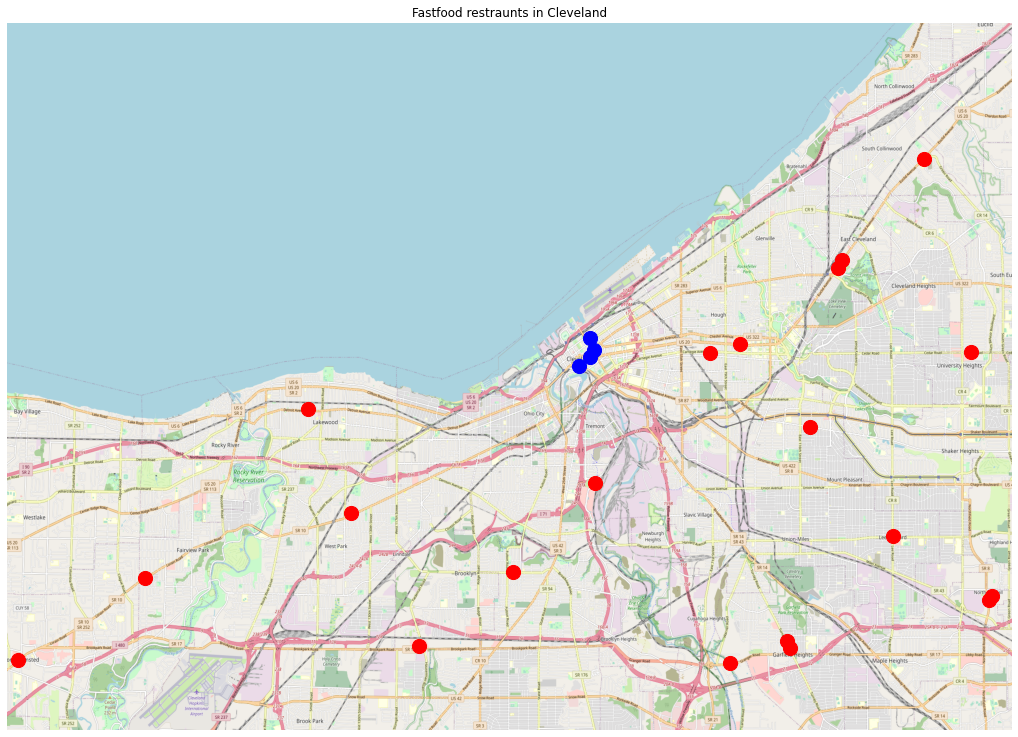

In [15]:
BBox = cityboxes['Cleveland']

fig, ax = plt.subplots()

fig.set_figwidth(18) 
fig.set_figheight(13) 


ax.scatter(df.longitude, df.latitude, zorder=1, alpha= 1, c='r', s=200)
ax.scatter([-81.694045,-81.689376,-81.687538,-81.689369], [41.497489, 41.500056,41.501889,41.5052260], zorder=1, alpha= 1, c='b', s=200)
ax.set_title('Fastfood restraunts in Cleveland')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(Cleveland_map, zorder=0, extent = BBox, aspect= 'auto')
ax.set_axis_off()

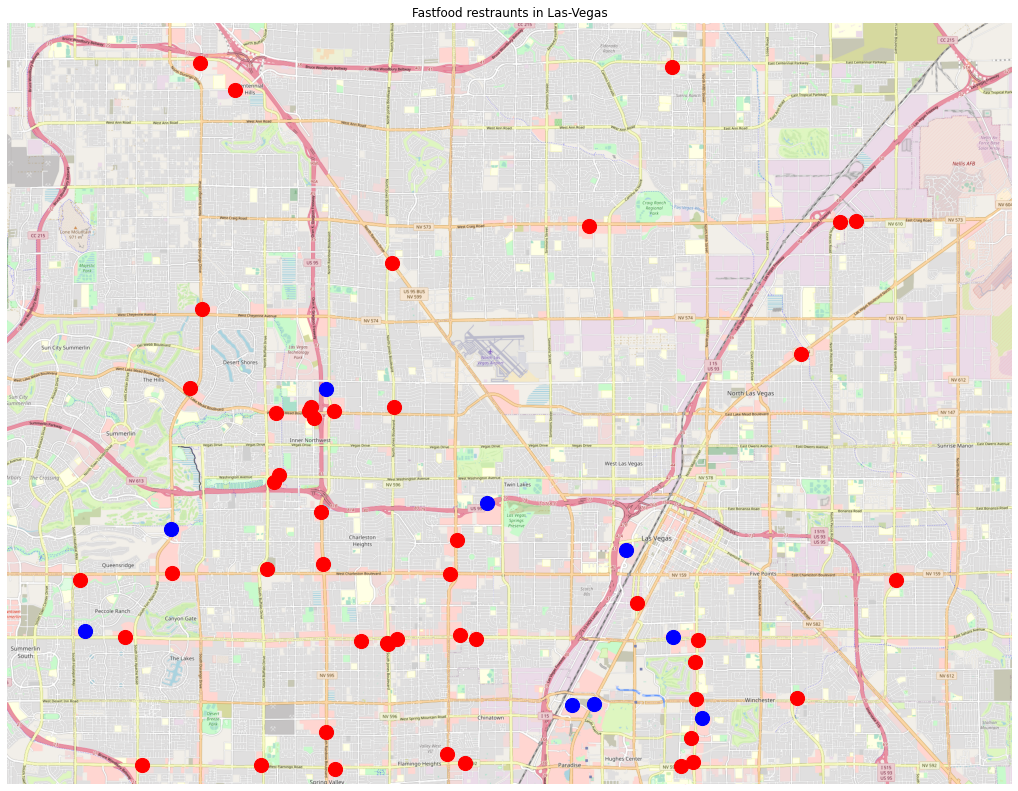

In [16]:
BBox = cityboxes['Las-Vegas']

fig, ax = plt.subplots()

fig.set_figwidth(18) 
fig.set_figheight(14) 


ax.scatter(df.longitude, df.latitude, zorder=1, alpha= 1, c='r', s=200)
ax.scatter([-115.312008,-115.287543,-115.242996,-115.197036,-115.172597,-115.166254,-115.157331,-115.14379,-115.135455], [36.145774,36.169289,36.201446,36.175238,36.128778,36.128995,36.164527,36.144527,36.125926], zorder=1, alpha= 1, c='b', s=200)
ax.set_title('Fastfood restraunts in Las-Vegas')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(LasVegas_map, zorder=0, extent = BBox, aspect= 'auto')
ax.set_axis_off()

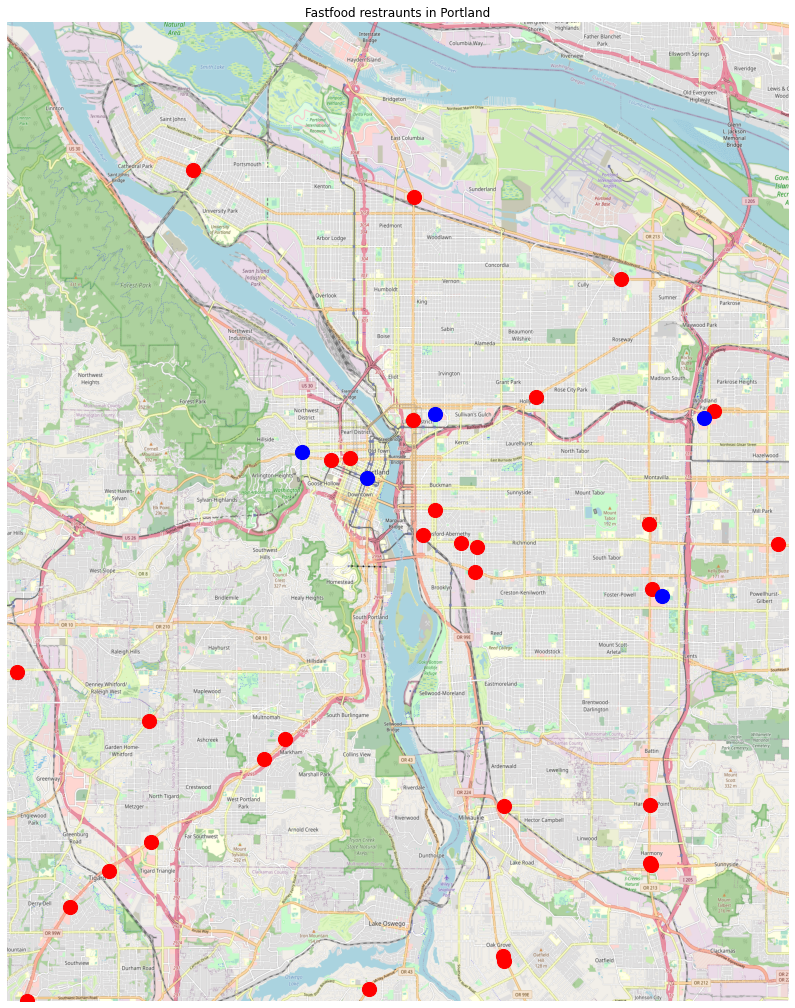

In [17]:
BBox = cityboxes['Portland']

fig, ax = plt.subplots()

fig.set_figwidth(14) 
fig.set_figheight(18) 


ax.scatter(df.longitude, df.latitude, zorder=1, alpha= 1, c='r', s=200)
ax.scatter([-122.67754,-122.700366,-122.653959,-122.574667,-122.560090], [45.518900,45.524616,45.533073,45.493027,45.532169], zorder=1, alpha= 1, c='b', s=200)
ax.set_title('Fastfood restraunts in Portland')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(Portland_map, zorder=0, extent = BBox, aspect= 'auto')
ax.set_axis_off()